# Student Performance Prediction

## Training model and evaluation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\rohan\\Desktop\\WorkSpace\\Student-Performance-Prediction\\dataset\\StudentsPerformance.csv")

# Feature Engineering
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

def categorize_performance(score):
    if score >= 85:
        return "High"
    elif score >= 70:
        return "Medium"
    else:
        return "Low"

df["performance"] = df["average_score"].apply(categorize_performance)

# Encode categorical variables
label_encoders = {}
categorical_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and Target
X = df[categorical_cols + ["math score", "reading score", "writing score"]]
y = df["performance"]

# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save model and tools
joblib.dump(model, "rf_model.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(label_encoders, "label_encoders.joblib")

# Evaluate
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 17   0   0]
 [  0 107   3]
 [  1   2  70]]

Classification Report:
               precision    recall  f1-score   support

        High       0.94      1.00      0.97        17
         Low       0.98      0.97      0.98       110
      Medium       0.96      0.96      0.96        73

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.97      0.97      0.97       200



## Prediction


Sample Predictions:
    math score  reading score  writing score predicted_performance
0          88             92             85                  High
1          55             60             58                   Low


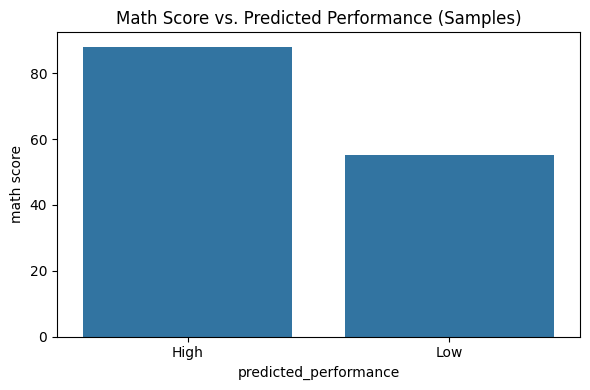

In [14]:
sample_students = pd.DataFrame([
    {
        "gender": "female",
        "race/ethnicity": "group C",
        "parental level of education": "bachelor's degree",
        "lunch": "standard",
        "test preparation course": "completed",
        "math score": 88,
        "reading score": 92,
        "writing score": 85
    },
    {
        "gender": "male",
        "race/ethnicity": "group A",
        "parental level of education": "some high school",
        "lunch": "free/reduced",
        "test preparation course": "none",
        "math score": 55,
        "reading score": 60,
        "writing score": 58
    }
])

# Encode and scale new data
for col in categorical_cols:
    sample_students[col] = label_encoders[col].transform(sample_students[col])

sample_X = sample_students[categorical_cols + ["math score", "reading score", "writing score"]]
sample_scaled = scaler.transform(sample_X)

# Predict
sample_students["predicted_performance"] = model.predict(sample_scaled)
print("\nSample Predictions:\n", sample_students[["math score", "reading score", "writing score", "predicted_performance"]])

plt.figure(figsize=(6, 4))
sns.barplot(x="predicted_performance", y="math score", data=sample_students)
plt.title("Math Score vs. Predicted Performance (Samples)")
plt.tight_layout()
plt.show()
